In [1]:
#From A. Muller https://github.com/amueller/mglearn/blob/master/mglearn/tools.py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import pandas as pd
import os

#set datadir based on cwd
cwd = os.getcwd()
#OSX
datadir = cwd + '/data/'
df = pd.read_csv(datadir+'data_clean.csv',index_col=0)

#Windows
#datadir = cwd + '\\data\\'
#df = pd.read_csv(datadir+'data_clean.csv')

In [2]:
train_df = df.sample(frac=0.7, replace=False)
test_df = df[~df.index.isin(train_df.index)]
#check if train_df and test_df overlap
len(train_df) + len(test_df) == len(df)

True

In [3]:
#Declare target variable, training data and testing data
target = 'NewArrest36'
train = train_df
test = test_df

#Set up X Y
X_train = train.drop(target, 1)
Y_train = train[target]
X_test = test.drop(target, 1)
Y_test = test[target]

In [8]:
cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

# create a smooth transition from the first to to the second color of cm3
# similar to RdBu but with our red and blue, also not going through white,
# which is really bad for greyscale

cdict = {'red': [(0.0, 0.0, cm2(0)[0]),
                 (1.0, cm2(1)[0], 1.0)],

         'green': [(0.0, 0.0, cm2(0)[1]),
                   (1.0, cm2(1)[1], 1.0)],

         'blue': [(0.0, 0.0, cm2(0)[2]),
                  (1.0, cm2(1)[2], 1.0)]}

ReBl = LinearSegmentedColormap("ReBl", cdict)


def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines



cm = cm2

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = [cm(1) if c < 0 else cm(0)
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")
    


In [9]:
features=X_train.columns.values
visualize_coefficients(logreg1.coef_,features,n_top_features=15)

TypeError: visualize_coefficients() missing 1 required positional argument: 'feature_names'

In [ ]:
#From Intro to ML with Python by A Muller.
#Use Recursive Feature Elimination to find best model with n_feat
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

n_feat = 5

select = RFE(RandomForestClassifier(n_estimators=100,random_state=13),n_features_to_select=n_feat)
select.fit(X_train,Y_train)

In [ ]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel('sample index')

In [ ]:
X_train_rfe = select.transform(X_train_1)
X_test_rfe = select.transform(X_test_1)

In [10]:
def AUCCal(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label = str(col) + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    return roc_auc 

In [13]:
#Check auc scores for all features
featureset = list(X_train.columns.values)
feature_auc_dict = {}


fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#create a plot and set some options
for col in X_train.columns:
    feature_auc_dict[col] = AUCCal(X_train[col],Y_train,col)
    
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [15]:
from sklearn.feature_selection import mutual_info_classif
#calculate mi for each feature 
feature_mi = mutual_info_classif(X_train,Y_train)
feature_mi_dict = dict(zip(X_train.columns.values, feature_mi))

#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_mi = pd.DataFrame(pd.Series(feature_mi_dict), columns = ['mi'])   

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_mi, left_index = True, right_index = True)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)
featureset_1 = list(feat_ranks[(feat_ranks.auc <= 20)].index.values)

X_train_1 = X_train[featureset_1]
X_test_1 = X_test[featureset_1]

rf_def = RandomForestClassifier(criterion='entropy')
rf_def = rf_def.fit(X_train_1, Y_train)
rf_pred =rf_def.predict_proba(X_test_1)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, rf_pred)
roc_auc = auc(fpr, tpr)
accuracy = rf_def.score(X_test_1, Y_test)

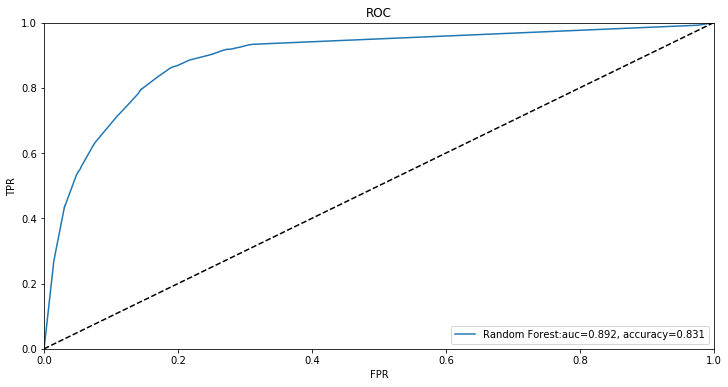

In [27]:
#Plot
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

plt.plot(fpr,tpr,label="Random Forest:auc=%.3f, accuracy=%.3f" % (roc_auc,accuracy))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

The following two are forest specific:<br/>
n_estimators - the number of trees (and bootstrapped samples) to be used <br/>
max_features - the number of features that will be randomly sampled for each tree.